# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [128]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [129]:
import numpy as np

y = np.where(y == 2, -1, np.where(y == 4, 1, y))

X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0)) 

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

C:\Users\kajet\AppData\Local\Temp\ipykernel_16032\2589349304.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X[:, 1], X[:, 2], c=y, s=300, alpha=0.5, cmap=plt.cm.get_cmap('PiYG'))


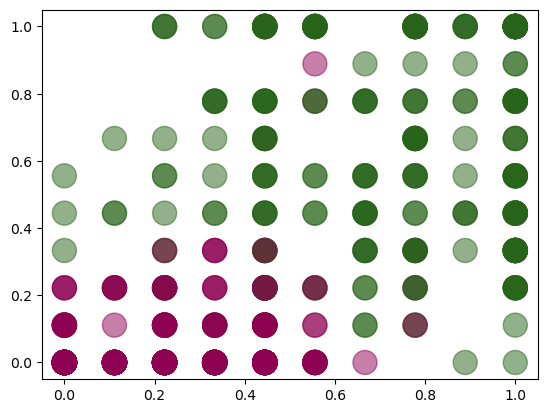

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X[:, 1], X[:, 2], c=y, s=300, alpha=0.5, cmap=plt.cm.get_cmap('PiYG'))
plt.show()

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [131]:
Beta = np.linalg.inv(X.T @ X) @ X.T @ y

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

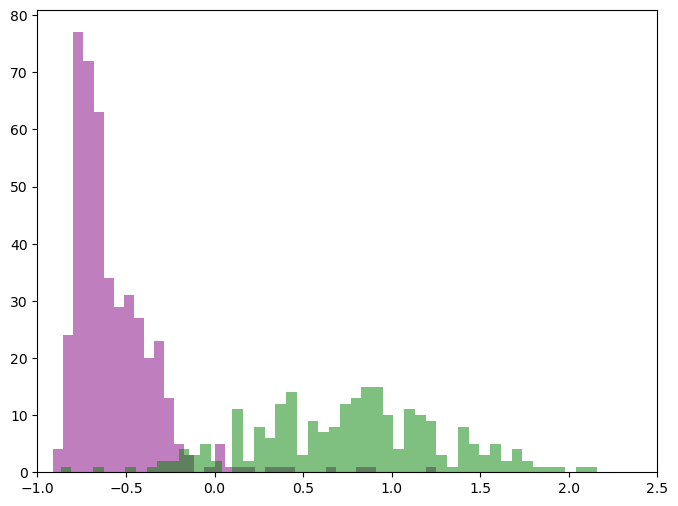

In [132]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(np.dot(X[y == -1], Beta), bins=145, alpha=0.5, color="Purple")
ax.hist(np.dot(X[y == 1], Beta), bins=50, alpha=0.5, color="Green")
ax.set_xlim(-1, 2.5)

plt.show()

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [133]:
klasyfikowani = np.where(np.dot(X, Beta) < 0, -1, 1)

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [134]:
ok = np.sum(klasyfikowani == y)
accuracy = ok / len(klasyfikowani)
print(f"Model accuracy: {accuracy:.2%}")

Model accuracy: 94.88%


### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [135]:
def regularyzacja_C(X, y):
    najlepsze_C = 0
    acc_max = 0
    for c in np.logspace(-3, 3, 100):
        Beta = np.linalg.inv((X.T @ X) + (1 / c) * np.eye(X.shape[1])) @ X.T @ y
        pred = np.where(np.dot(X, Beta) < 0, -1, 1)
        acc = np.sum(pred == y) / len(pred)
        if acc > acc_max:
            acc_max = acc
            najlepsze_C = c
    return (acc_max, najlepsze_C)

print(regularyzacja_C(X, y))


(0.9502196193265008, 0.8111308307896873)


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [144]:
import numpy as np

class LRClassifier:
    def __init__(self, C, scale=True):
        self.C = C
        self.scale = scale
        self.feature_min = None  
        self.feature_max = None  
        self.first_value = None
        self.second_value = None
    
    def fit(self, X, y):
        if self.scale:
            self.feature_min = np.min(X, axis=0)
            self.feature_max = np.max(X, axis=0)
            range = self.feature_max - self.feature_min
            range[range == 0] = 1
            X_scaled = (X - self.feature_min) / range
        else:
            X_scaled = np.copy(X)
        
        unique_values = np.unique(y)
        
        self.first_value, self.second_value = unique_values
        y_labeled = np.where(y == self.first_value, 1, -1)
        I = np.eye(X_scaled.shape[1])
        self.Beta = np.linalg.solve(X_scaled.T @ X_scaled + (1 / self.C) * I, X_scaled.T @ y_labeled)

    def predict(self, X):
        if self.scale:
            range = self.feature_max - self.feature_min
            range[range == 0] = 1
            X_scaled = (X - self.feature_min) / range
        else:
            X_scaled = np.copy(X)

        predictions = np.dot(X_scaled, self.Beta)
        print(self.Beta)
        pred = np.where(predictions < 0, -1, 1)
        res = np.where(pred == 1, self.first_value, self.second_value)
        return res


In [145]:
clf = LRClassifier(C=100)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1], [1, 23]])
print(clf.predict(X))

[ 0.         -1.06100796]
['x' 'y' 'y' 'y']
